<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-24/litao3_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 613, done.
remote: Counting objects: 100% (416/416), done.
remote: Compressing objects: 100% (273/273), done.
remote: Total 613 (delta 216), reused 270 (delta 140), pack-reused 197
Receiving objects: 100% (613/613), 28.13 MiB | 8.21 MiB/s, done.
Resolving deltas: 100% (292/292), done.
Updating files: 100% (71/71), done.


'/content'

# 24-06-24 LiTaO3 gating

First part : measurement of the current source/drain

Seconde part : gate/drain

Finally : gating
- Frequency : 0.1 Hz
- Amplitude : 0.5 Vpp
- Offset 350 mV
- Duty Cycle : 75%


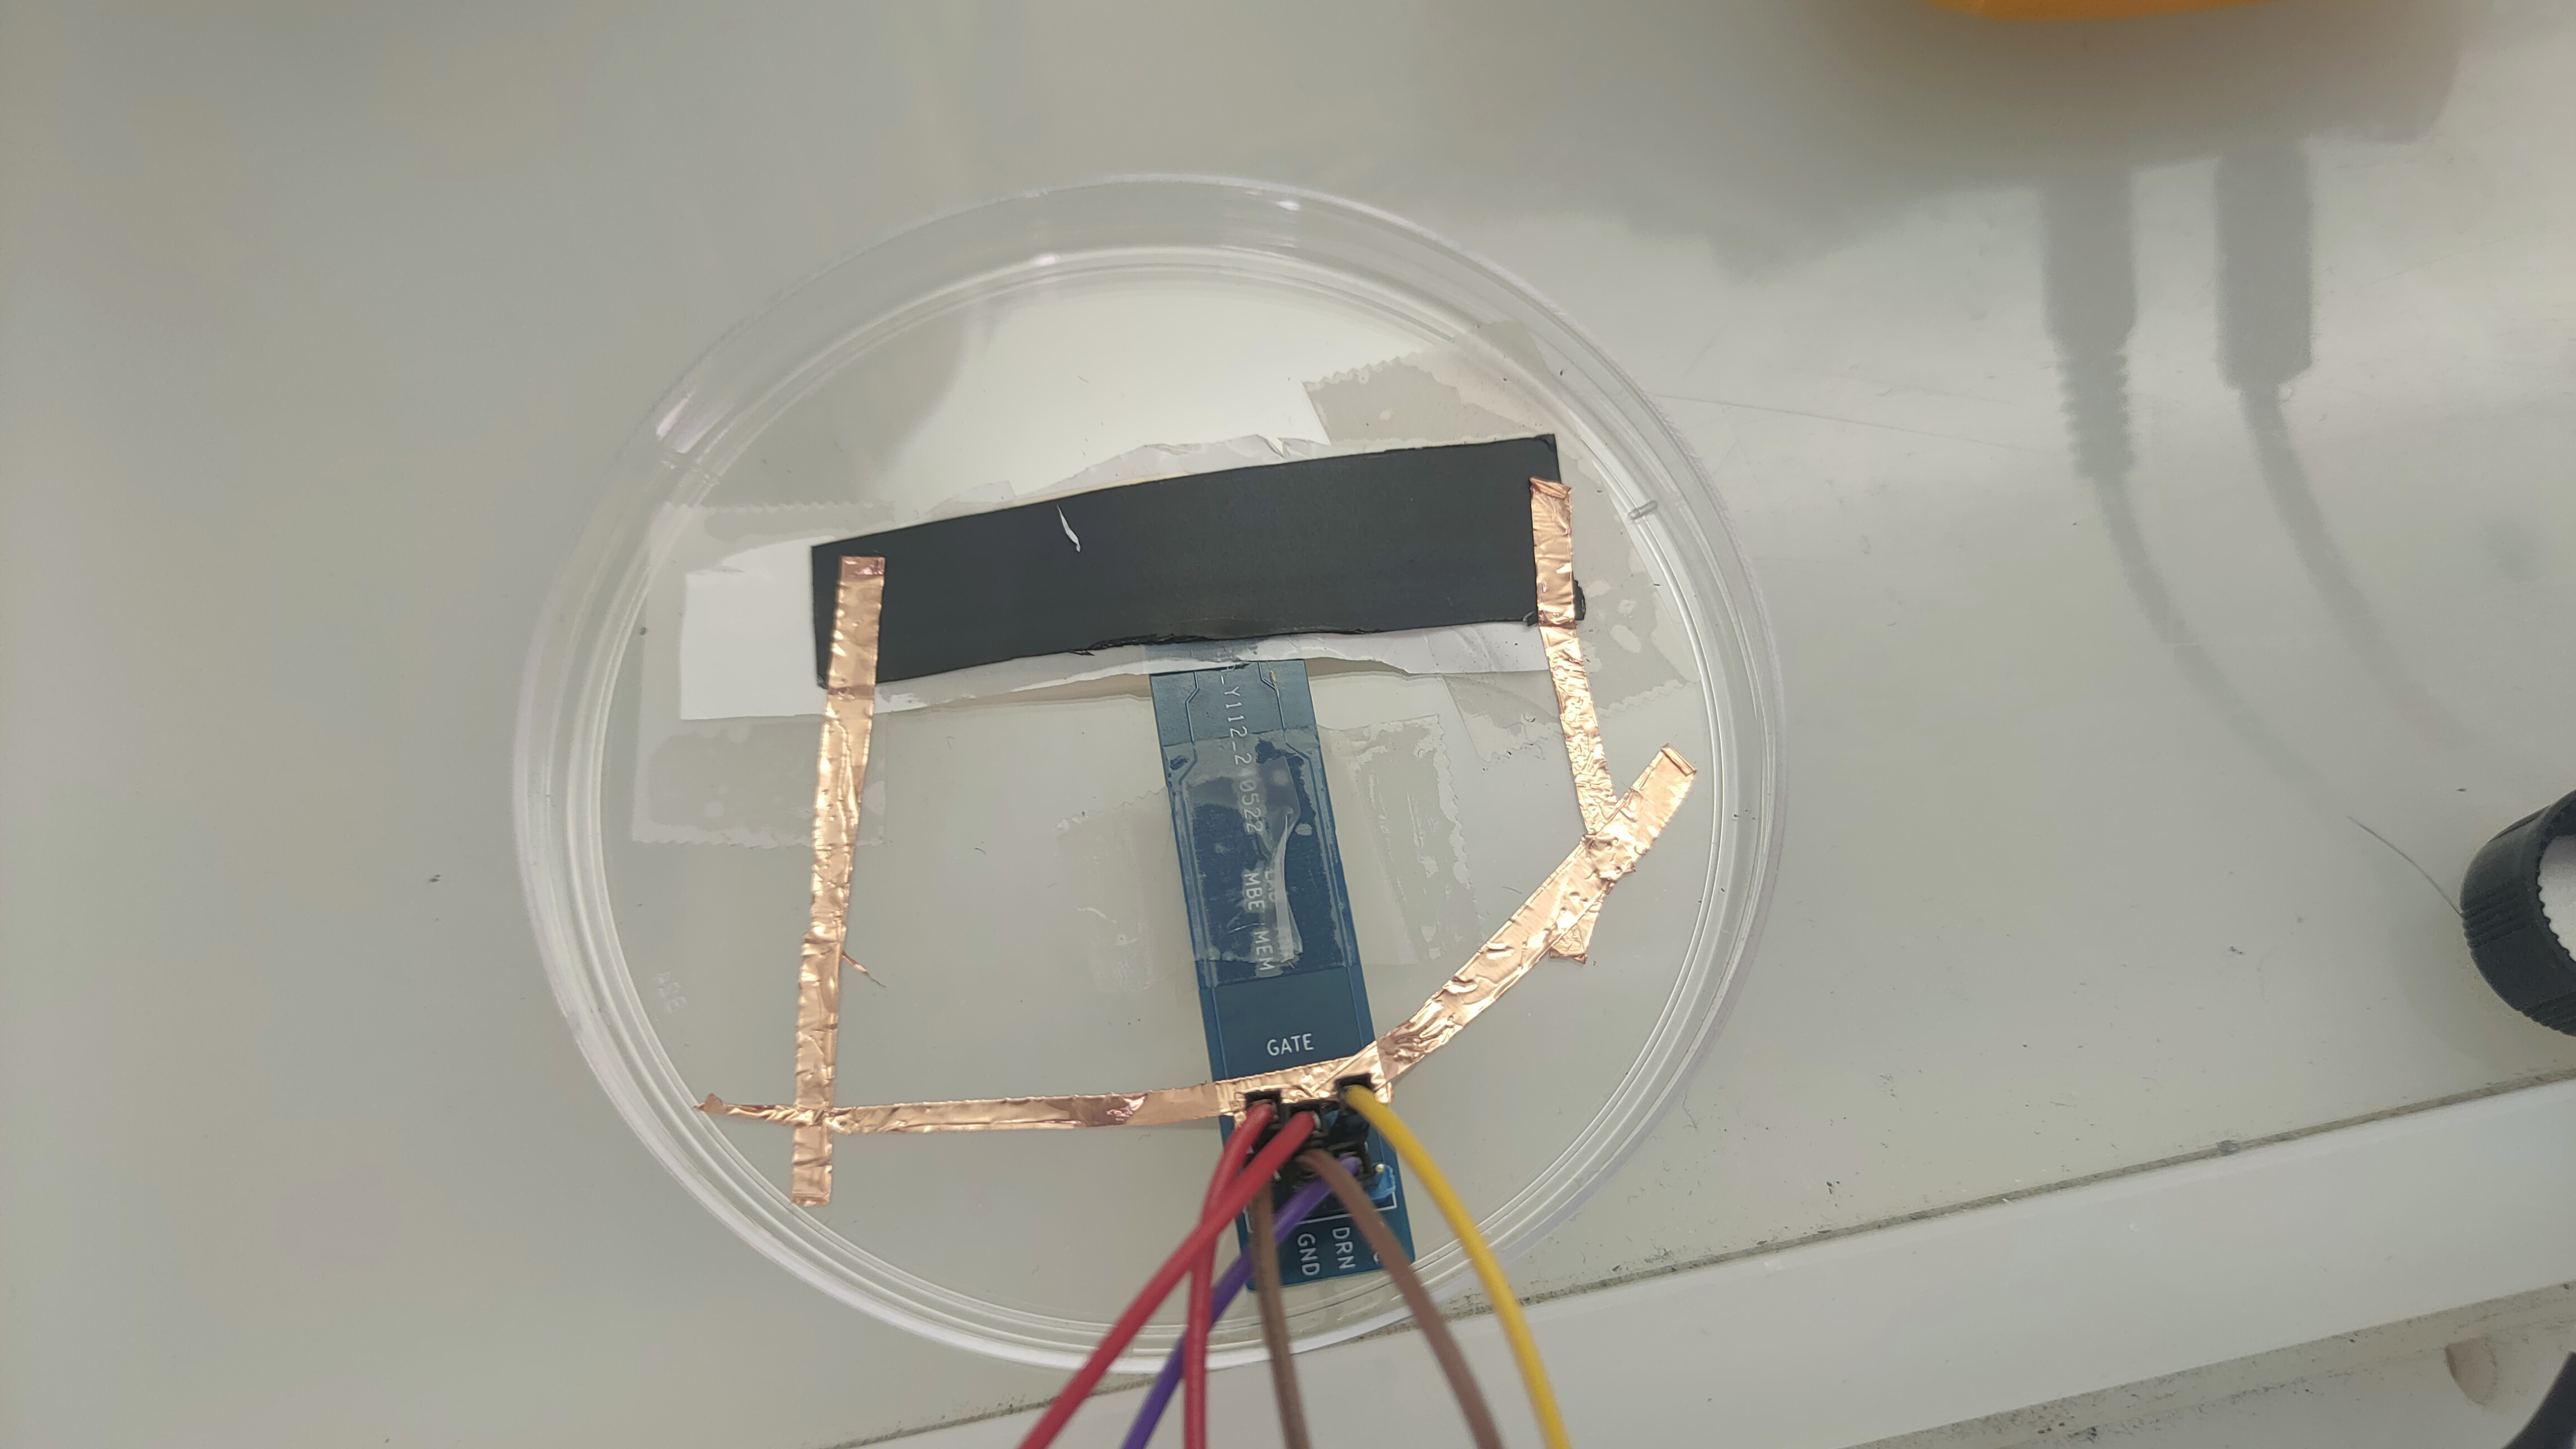




# Base Time
06/20/2024 12:42:09

In [3]:
%cd "/content/gator/data/06-24/"

/content/gator/data/06-24


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [5]:
prep_csv('defbuffer1_0624_152426.csv')
df = pd.read_csv('defbuffer1_0624_152426.csv')


Fill Mode,1



In [6]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-1.056986e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,8.322408e-03,Volt DC,1.000000e-02,F,2W,F,F,0.000000
1,2.961347e-11,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,9.141549e-06,Volt DC,1.000000e-02,F,2W,F,F,0.371741
2,-3.819484e-11,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,9.910000e+37,Volt DC,1.000000e+13,F,2W,F,F,0.974948
3,-1.032562e-09,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,1.095278e-05,Volt DC,1.000000e-02,F,2W,F,F,1.346660
4,3.363388e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-1.175884e-02,Volt DC,1.000000e-02,F,2W,F,F,1.949849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69370,2.280466e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,9.999720e-01,Volt DC,1.000000e+00,T,2W,F,F,7947.145769
69371,2.298301e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,9.999716e-01,Volt DC,1.000000e+00,T,2W,F,F,7947.215105
69372,2.273323e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,9.999737e-01,Volt DC,1.000000e+00,T,2W,F,F,7947.284442
69373,2.250261e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,9.999735e-01,Volt DC,1.000000e+00,T,2W,F,F,7947.353767


In [28]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

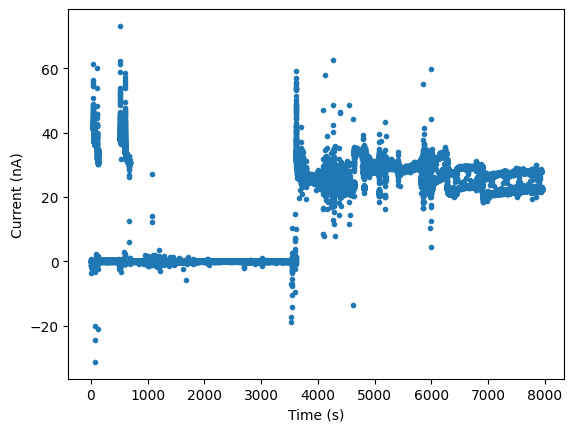

In [8]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

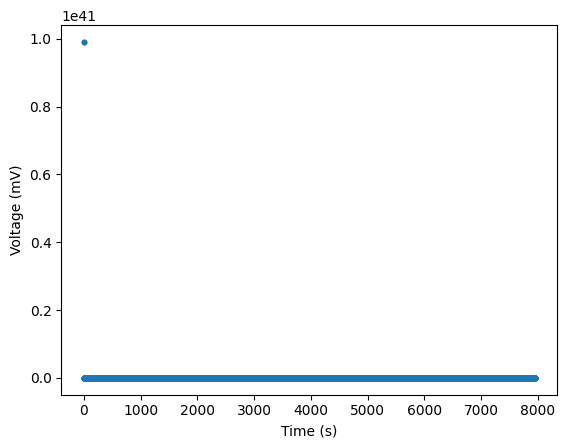

In [29]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

### Gate/Drain Voltage measurement



In [9]:
prep_csv('defbuffer1_0624_152912.csv')
df2 = pd.read_csv('defbuffer1_0624_152912.csv')

Fill Mode,1



In [10]:
df2

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-1.234719e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.002565,Volt DC,1,F,2W,F,F,0.000000
1,-9.294864e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.001913,Volt DC,1,F,2W,F,F,0.721780
2,-8.184717e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.001060,Volt DC,1,F,2W,F,F,1.443508
3,-6.158618e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.001076,Volt DC,1,F,2W,F,F,2.165258
4,-1.315147e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.007536,Volt DC,1,F,2W,F,F,2.887049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1.867851e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.003568,Volt DC,1,F,2W,F,F,218.505153
319,-8.116928e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.003931,Volt DC,1,F,2W,F,F,219.226960
320,-8.904566e-10,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.000014,Volt DC,1,F,2W,F,F,219.775841
321,-7.921195e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.003803,Volt DC,1,F,2W,F,F,220.565730


In [41]:
# Time (s)
T = df2['Relative Time']

# Current (mA)
I = df2['Reading'] * 1e9

# Potential (mV)
V = df2['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

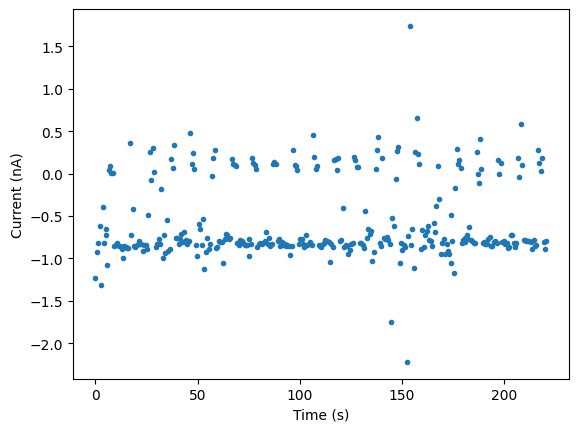

In [42]:

cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Each positive point represents the current when there's no gate voltage applied (25%) and each negative point represents the current when there's a gate voltage applied.

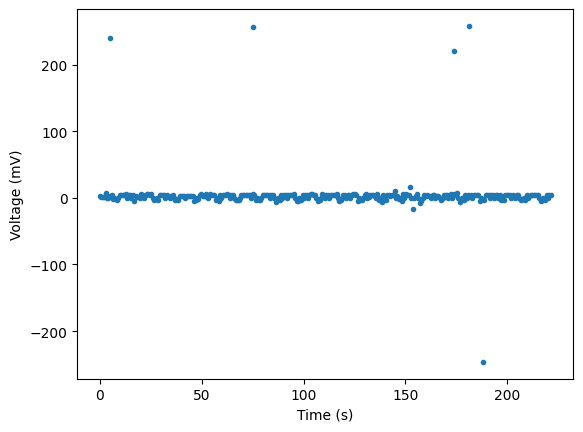

In [43]:
cut1 = 0
cut2 = None
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

In [44]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e9
df_new.loc[:, 'Value'] = df_new['Value'] * 100
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)

<ipython-input-44-e44d9732e7c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


In [45]:
# prompt: generately plotly express scatter plots of current and voltage over time from df_new

# fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)", "Vds (1e-2 V)"])
fig = px.scatter(df_new, x="Relative Time", y=["Vds (1e-2 V)"])
fig.show()

In [13]:
prep_csv('defbuffer1_0624_153525.csv')
df3 = pd.read_csv('defbuffer1_0624_153525.csv')

Fill Mode,1



In [14]:
df3

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,1.365831e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1,T,2W,F,F,0.000000
1,1.362559e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999978,Volt DC,1,T,2W,F,F,0.069358
2,1.365839e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1,T,2W,F,F,0.138685
3,1.375323e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999979,Volt DC,1,T,2W,F,F,0.208020
4,1.370307e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1,T,2W,F,F,0.277369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,1.165514e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999978,Volt DC,1,T,2W,F,F,152.763052
2101,1.175079e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999977,Volt DC,1,T,2W,F,F,152.832400
2102,1.178024e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999977,Volt DC,1,T,2W,F,F,152.901730
2103,1.177105e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999978,Volt DC,1,T,2W,F,F,152.971062


In [35]:
# Time (s)
T = df3['Relative Time']

# Current (mA)
I = df3['Reading'] * 1e9

# Potential (mV)
V = df3['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

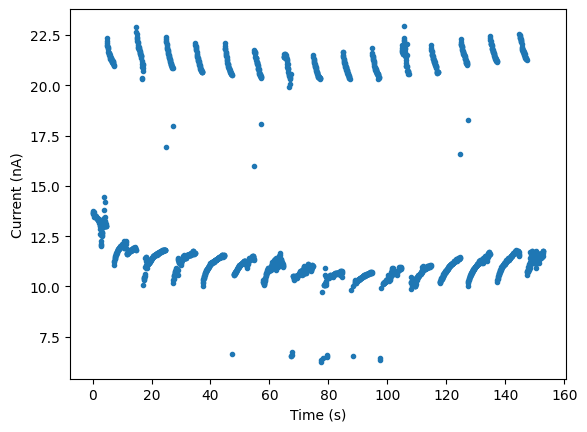

In [16]:


cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

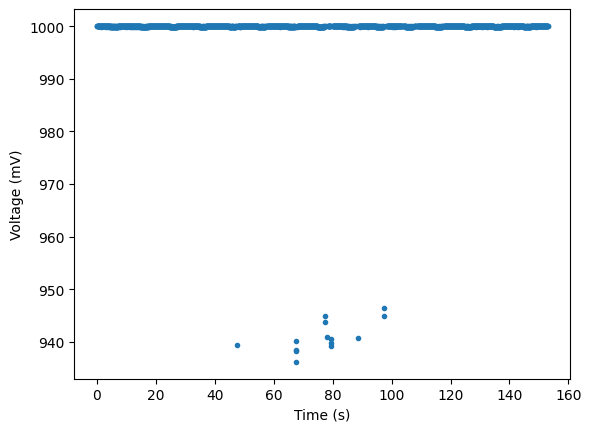

In [36]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

In [17]:
prep_csv('defbuffer1_0624_154230.csv')
df4 = pd.read_csv('defbuffer1_0624_154230.csv')

Fill Mode,1



In [18]:
df4

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-1.057301e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.011636,Volt DC,1,F,2W,F,F,0.000000
1,-4.292030e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.001334,Volt DC,1,F,2W,F,F,0.871816
2,-1.511113e-10,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.000013,Volt DC,1,F,2W,F,F,1.520677
3,1.643476e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.006373,Volt DC,1,F,2W,F,F,2.460568
4,-9.796335e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.009709,Volt DC,1,F,2W,F,F,3.332348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,-5.845058e-11,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.003395,Volt DC,1,F,2W,F,F,280.626572
374,-8.790962e-11,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.000013,Volt DC,1,F,2W,F,F,281.275467
375,-1.130889e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.002882,Volt DC,1,F,2W,F,F,282.215396
376,-7.985440e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.008117,Volt DC,1,F,2W,F,F,283.087155


In [19]:
# Time (s)
T = df4['Relative Time']

# Current (mA)
I = df4['Reading'] * 1e9

# Potential (mV)
V = df4['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

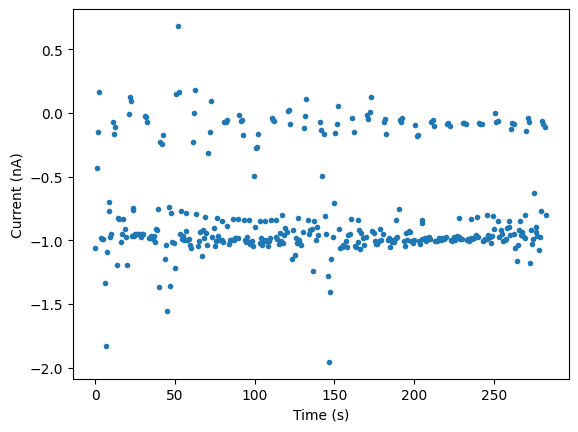

In [20]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

In [21]:
prep_csv('defbuffer1_0624_154602.csv')
df5 = pd.read_csv('defbuffer1_0624_154602.csv')

Fill Mode,1



In [22]:
df5

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-1.057301e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.011636,Volt DC,1,F,2W,F,F,0.000000
1,-4.292030e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.001334,Volt DC,1,F,2W,F,F,0.871816
2,-1.511113e-10,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.000013,Volt DC,1,F,2W,F,F,1.520677
3,1.643476e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.006373,Volt DC,1,F,2W,F,F,2.460568
4,-9.796335e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.009709,Volt DC,1,F,2W,F,F,3.332348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,4.586497e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999980,Volt DC,1,T,2W,F,F,494.668426
1404,3.478866e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.979517,Volt DC,1,T,2W,F,F,494.910158
1405,3.517117e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.979304,Volt DC,1,T,2W,F,F,494.979522
1406,3.560679e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.979031,Volt DC,1,T,2W,F,F,495.048890


In [23]:
# Time (s)
T = df5['Relative Time']

# Current (mA)
I = df5['Reading'] * 1e9

# Potential (mV)
V = df5['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

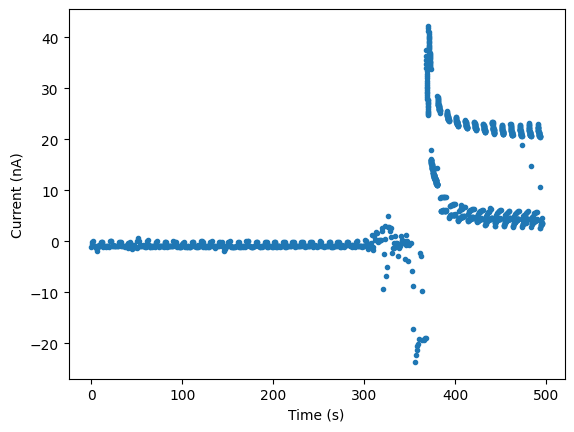

In [24]:
cut1 = 0
cut2 = len(T)
mask=I>-1000
I=I[mask]
T=T[mask]
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')